**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

**EQUIPO 36**
- Andrea Sánchez Martínez A01795414
- Juan Carlos Garza Sánchez A00821522
- Miguel Angel Mayori Vera A01795046
- Sergio Pulido Morales A01794935

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [3]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [4]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012
symmetry_mean,569.0,NaN,NaN,NaN,0.181162,0.027414,0.106,0.1619,0.1792,0.1957,0.304


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

1b) Valores únicos por variable para identificar posibles variables categóricas. 


**Unicamente la variable 'diagnosis' pudiera ser categórica**

In [6]:
data_df.nunique().to_frame()

,0
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


1c) Búsqueda de valores faltantes.

In [7]:
(data_df.isna().sum() / data_df.shape[0] * 100).to_frame()

,0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

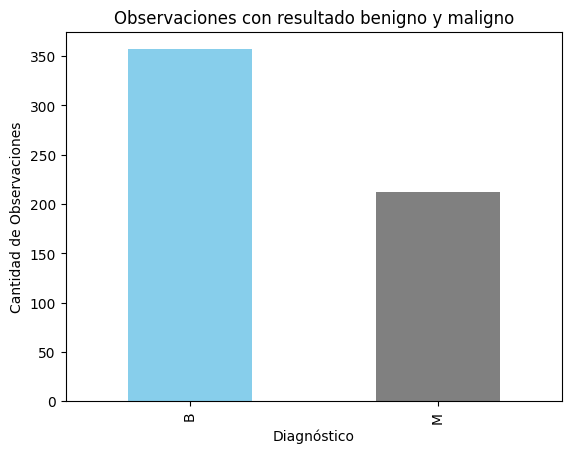

In [8]:
data_df['diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Observaciones con resultado benigno y maligno')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad de Observaciones')
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

<AxesSubplot:>

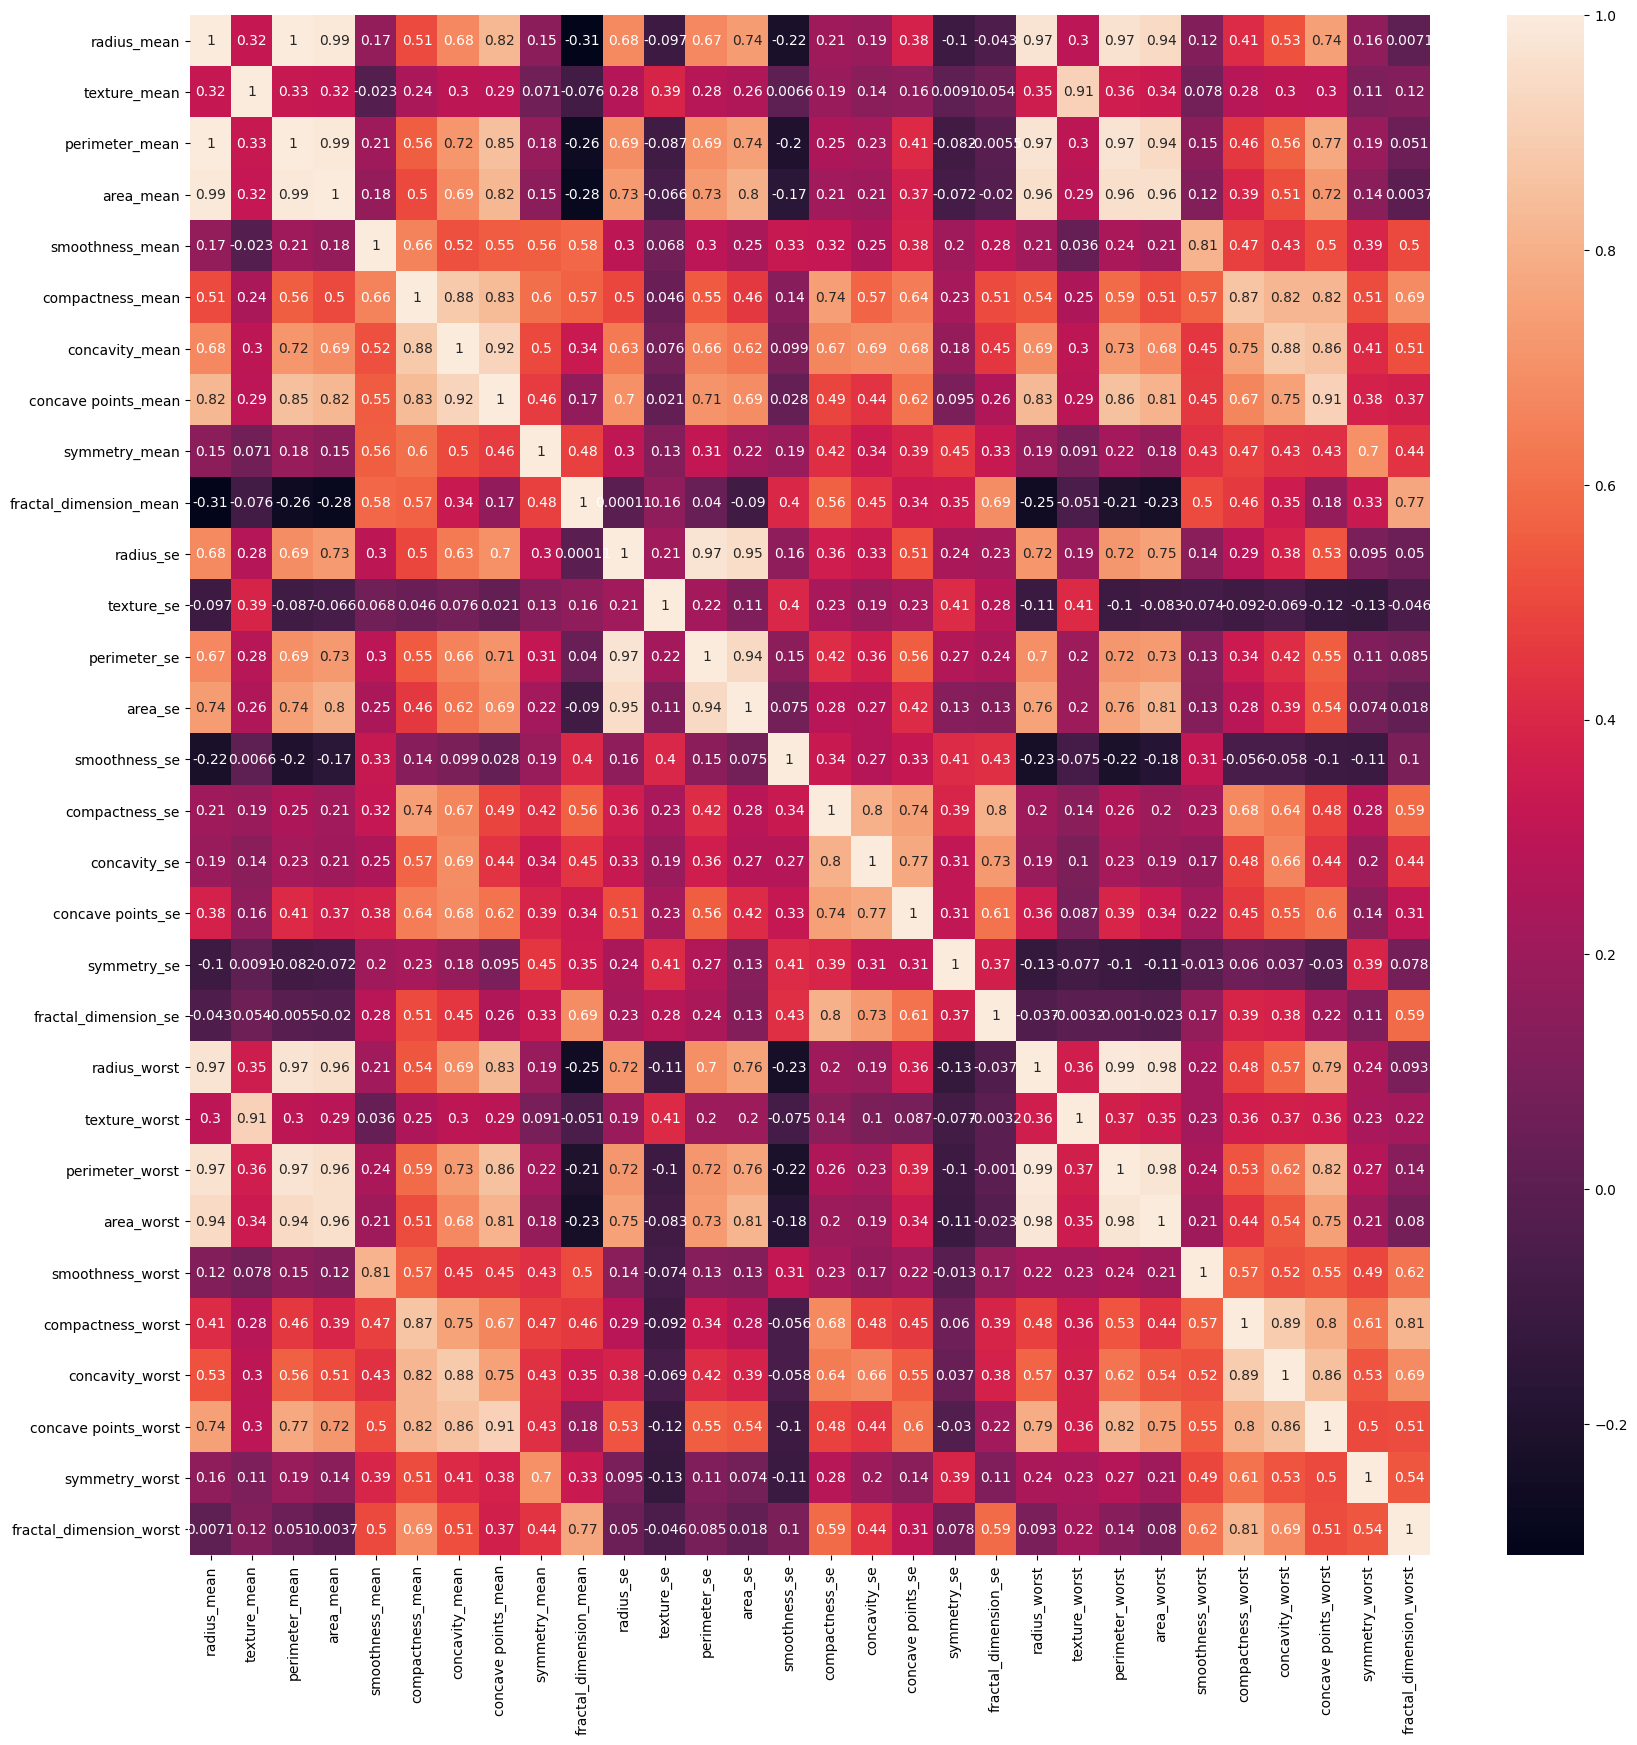

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=data_df.select_dtypes('number').corr(), annot=True)

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

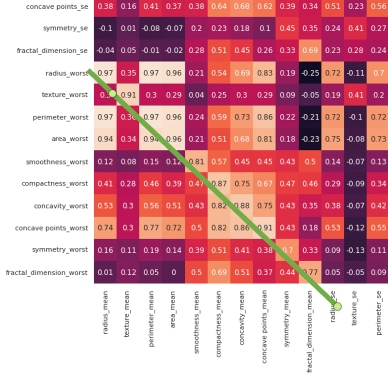

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [10]:
data_df.drop(data_df.filter(regex='_worst$').columns, axis=1, inplace=True)
data_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




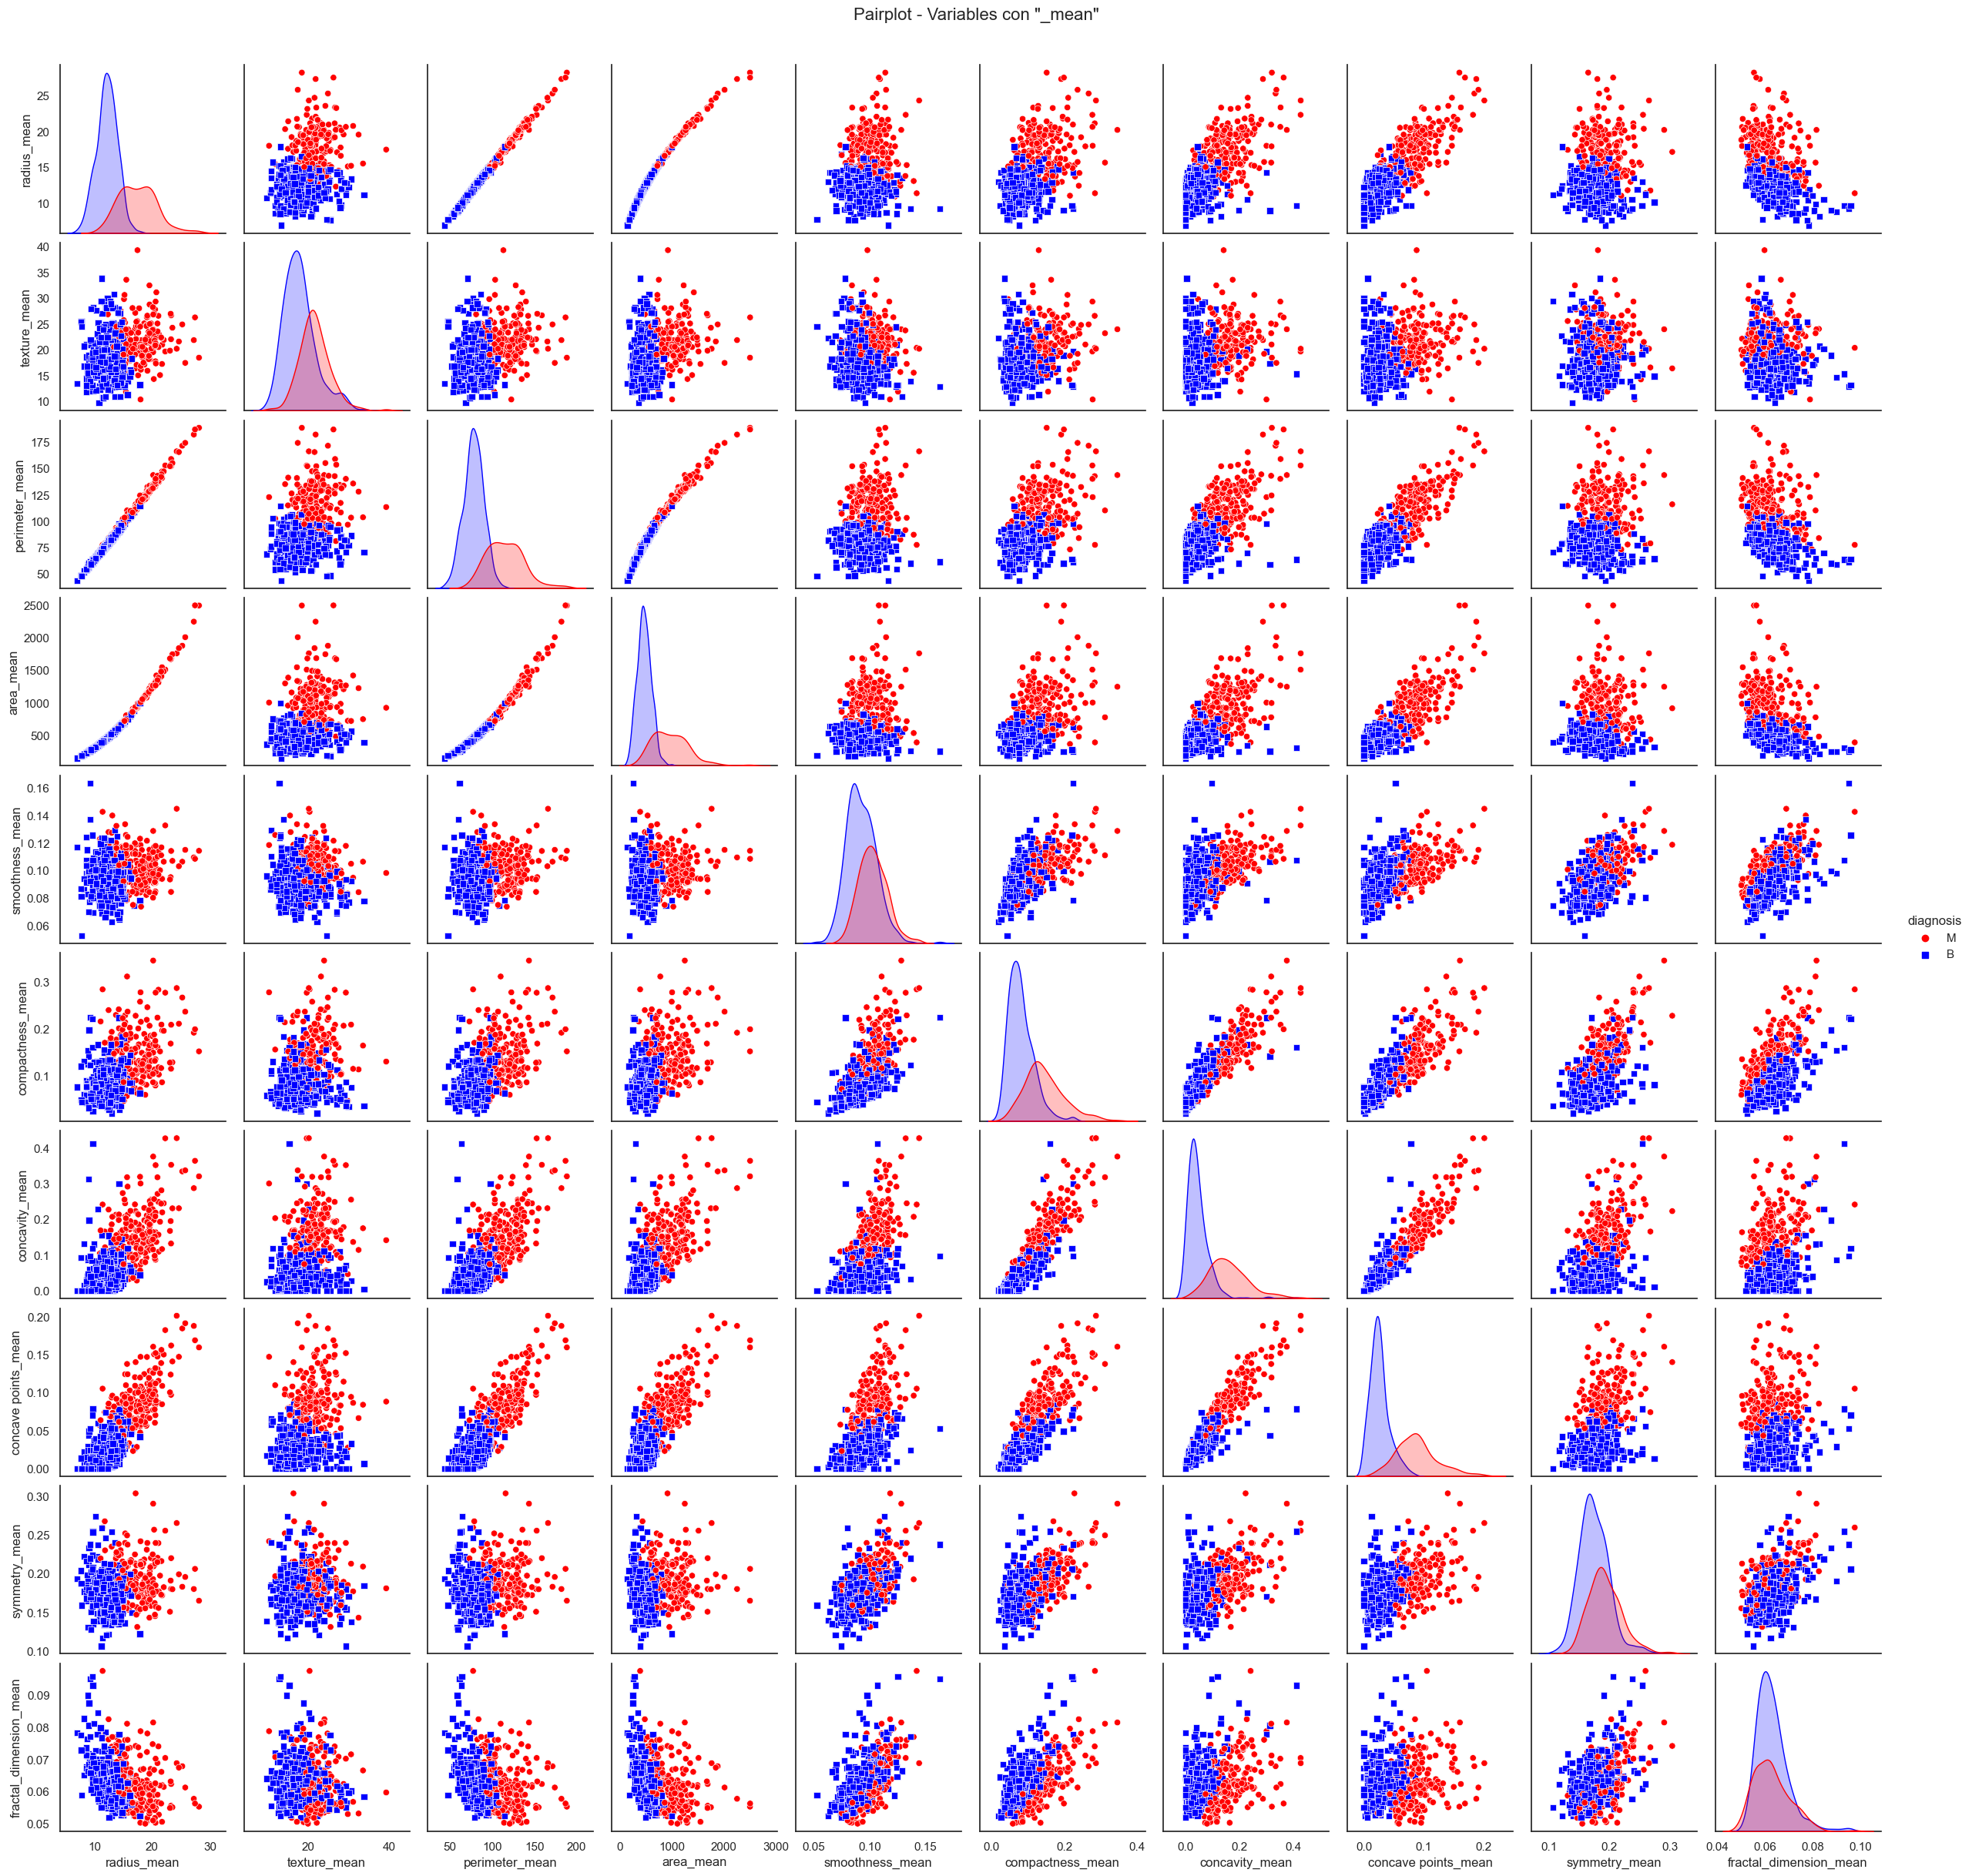

In [11]:
sns.set(style="white")
sns.pairplot(data=data_df[[
        'diagnosis',
        'radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']],
             hue='diagnosis', markers=['o', 's'], palette={"M": "red", "B": "blue"})
plt.subplots_adjust(top=0.95)
plt.suptitle('Pairplot - Variables con "_mean"', fontsize=16)
plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


<AxesSubplot:>

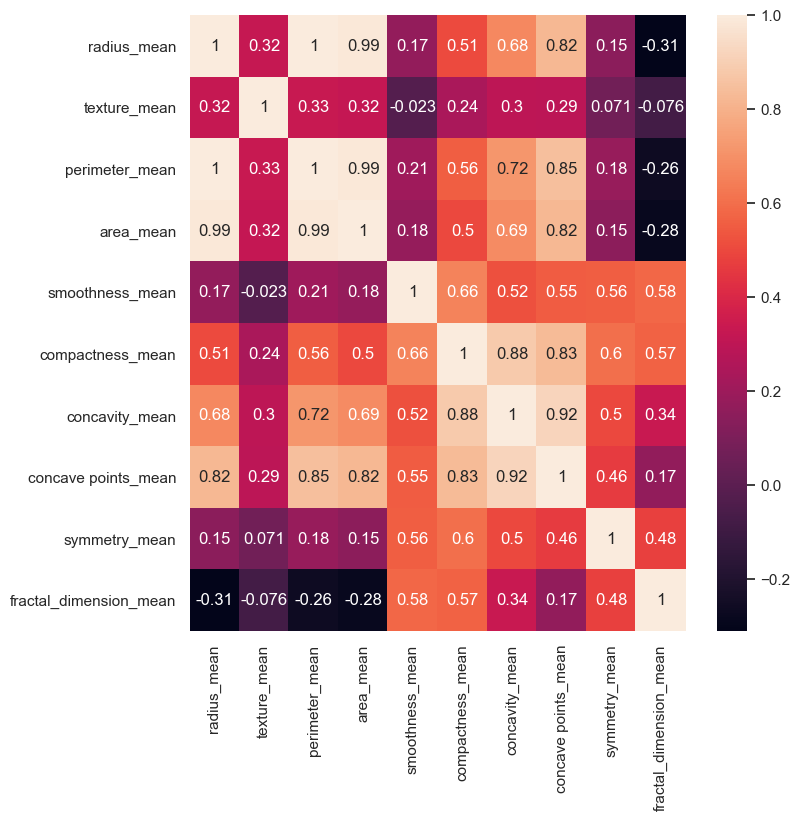

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(data=data_df.filter(regex='_mean$').corr(), annot=True)

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [13]:
data_df.drop(columns=['perimeter_mean','area_mean','concavity_mean','concave points_mean','perimeter_se','area_se','concavity_se','concave points_se'], inplace= True)

Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'symmetry_se'}>,
        <AxesSubplot:title={'center':'fractal_dimension_se'}>]],
      dtype=object)

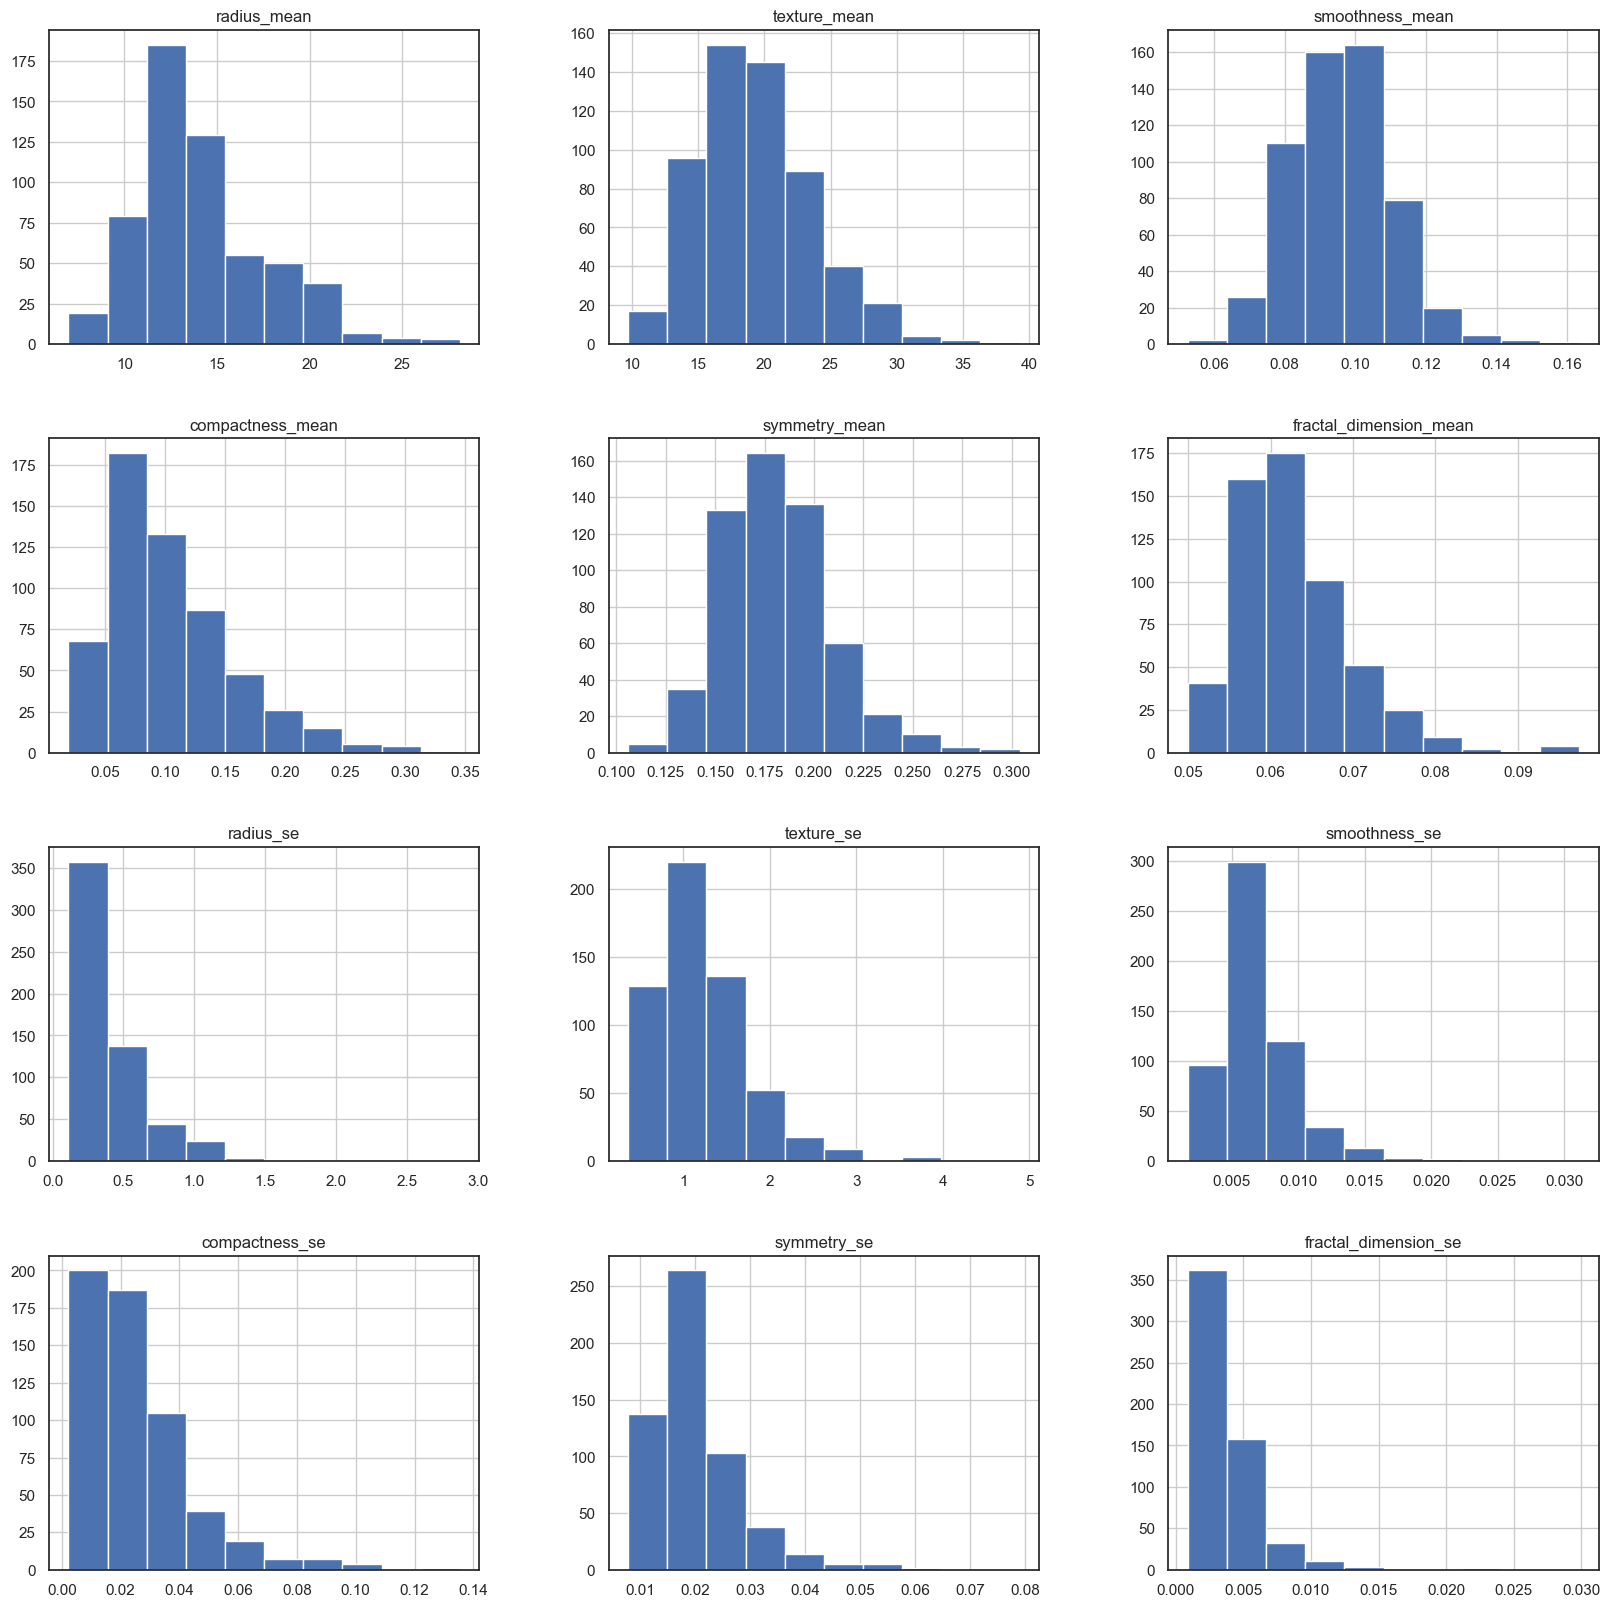

In [14]:
fig, axis = plt.subplots(4, 3, figsize=(20, 20))
data_df.select_dtypes('number').hist(ax=axis)

In [15]:
data_df.select_dtypes('number').skew()

radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.190123
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
radius_se                 3.088612
texture_se                1.646444
smoothness_se             2.314450
compactness_se            1.902221
symmetry_se               2.195133
fractal_dimension_se      3.923969
dtype: float64

In [16]:
skew_cols = []

for col in data_df.select_dtypes('number').columns:
  if data_df[col].skew() > 1:
    skew_cols.append(col)
    
skew_cols

['compactness_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se']

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


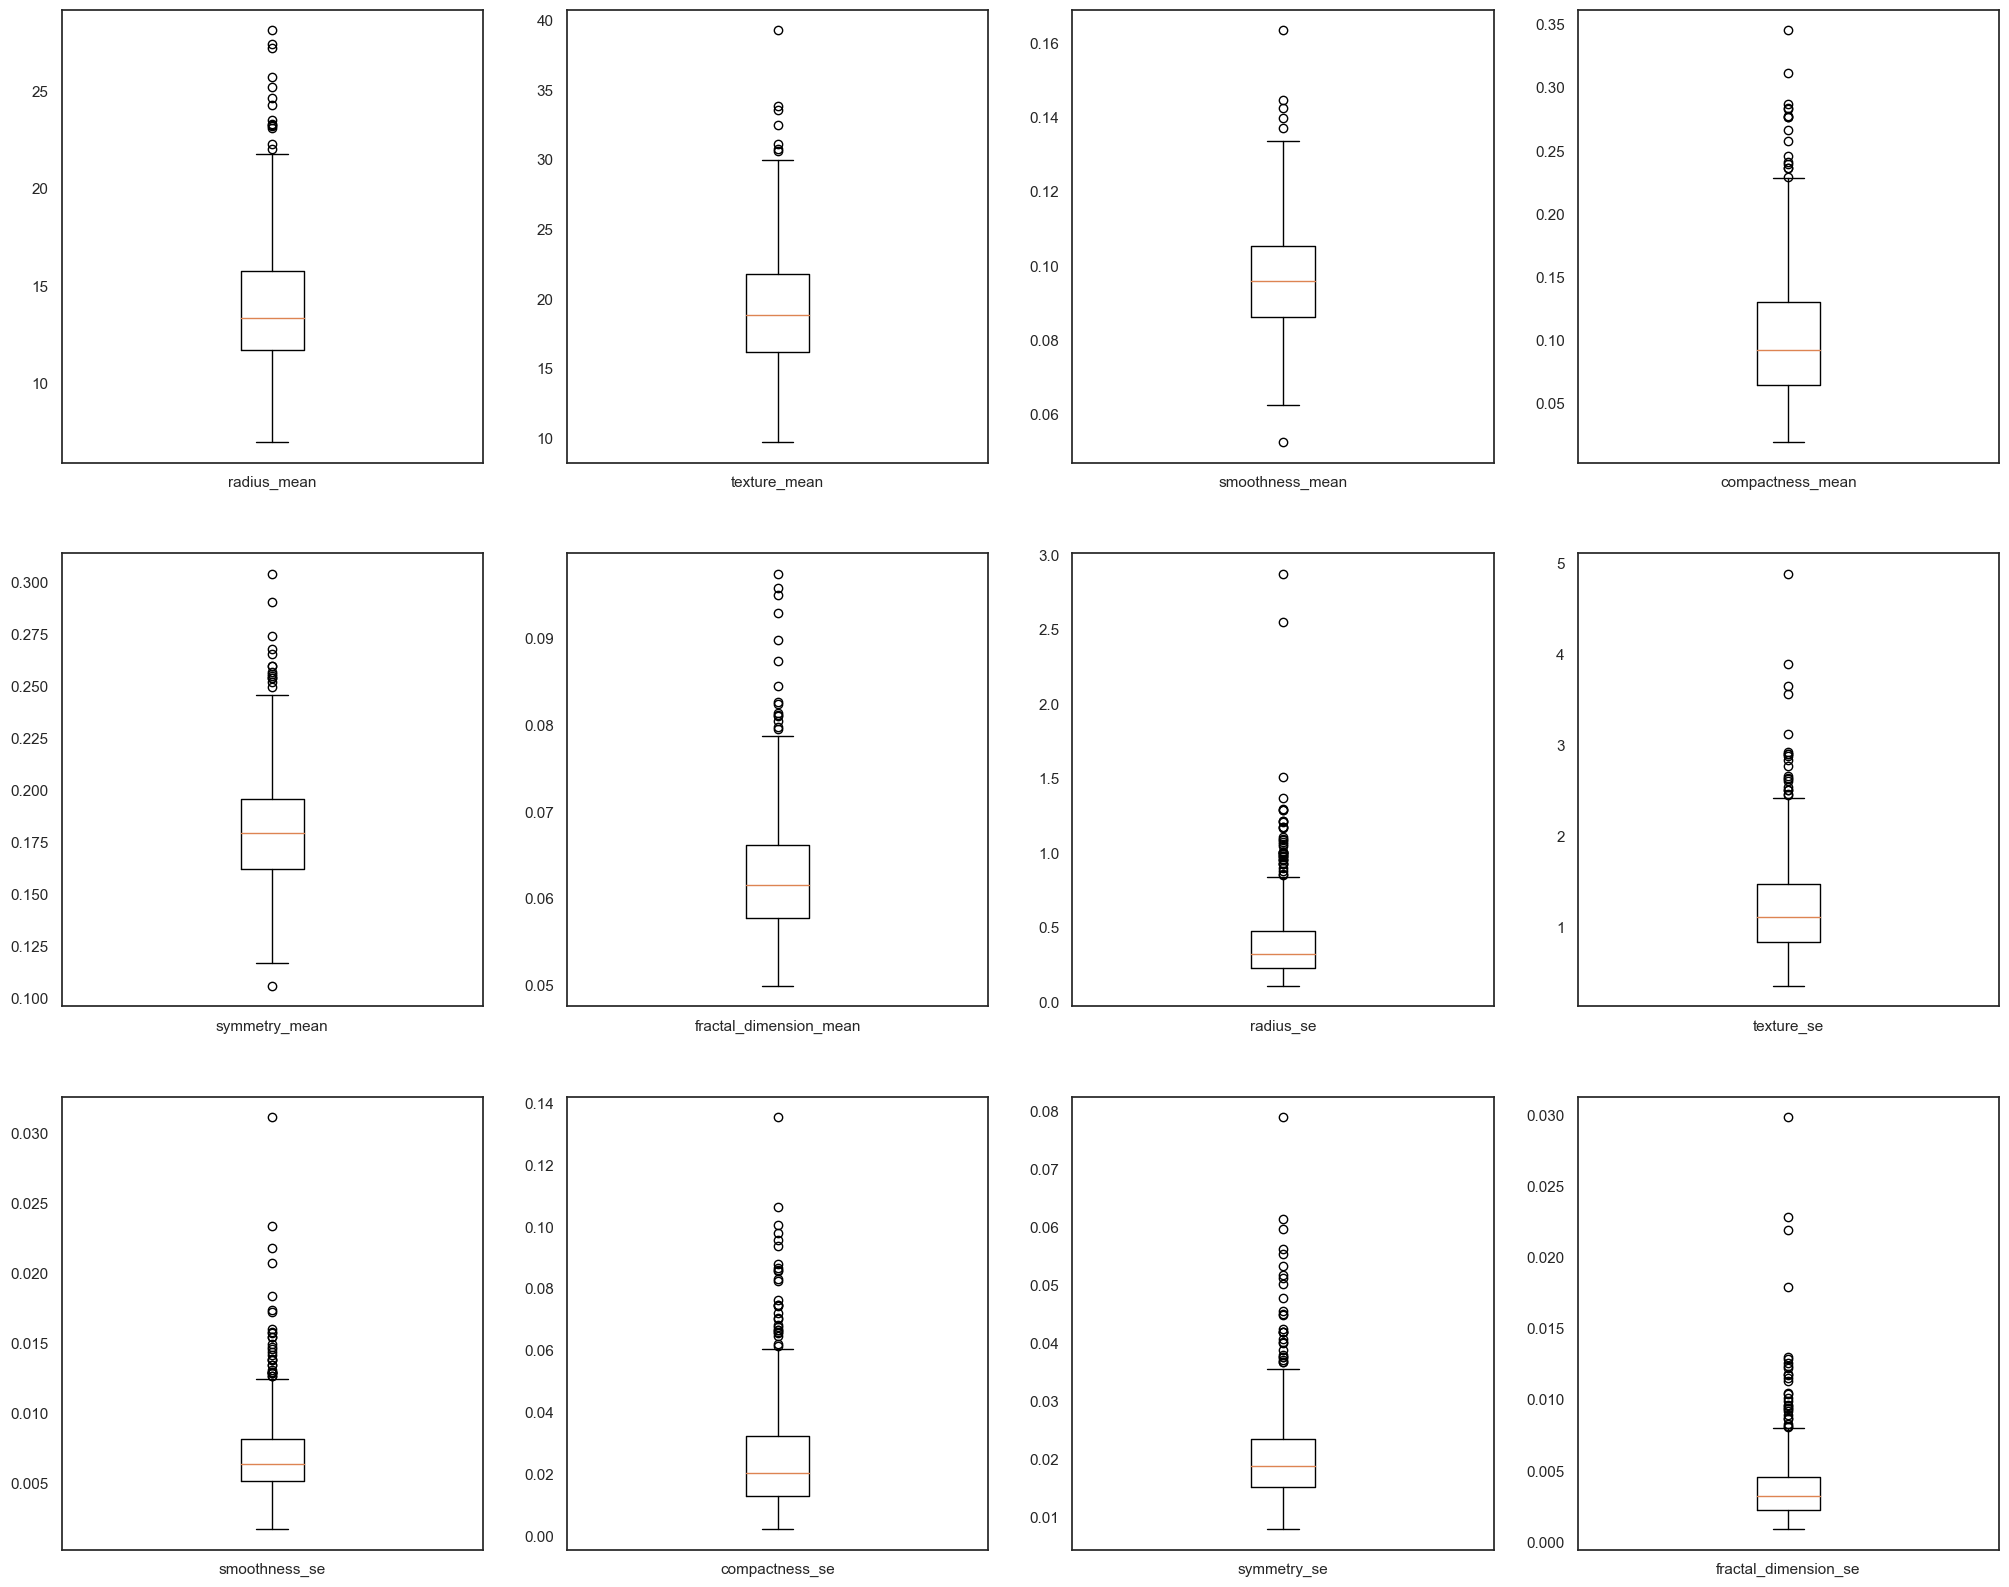

In [17]:
fig, axes = plt.subplots(3,4, figsize=(25,20))
axes = axes.ravel()
for col, ax in zip(data_df.select_dtypes('number'), axes):
  ax.boxplot(data_df[col].dropna(), labels=[f'{col}'])

In [18]:
info_data = data_df.select_dtypes('number').describe().T
info_data[info_data["max"]>1].index

scale_cols = info_data[ info_data["max"]>1].index.to_list()
scale_cols

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [19]:
from sklearn.model_selection import train_test_split

data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)
X = data_df.drop('diagnosis', axis=1)
y = data_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [20]:
print("Dimensiones del conjunto de entrenamiento X:", X_train.shape)
print("Dimensiones del conjunto de prueba X:", X_test.shape)
print("Dimensiones del conjunto de entrenamiento y:", y_train.shape)
print("Dimensiones del conjunto de prueba y:", y_test.shape)

Dimensiones del conjunto de entrenamiento X: (455, 30)
Dimensiones del conjunto de prueba X: (114, 30)
Dimensiones del conjunto de entrenamiento y: (455,)
Dimensiones del conjunto de prueba y: (114,)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [21]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(('drop', X_train.filter(regex='^perimeter|^area|^concavity|^concave|_worst$').columns.to_list()), remainder='passthrough')

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logr_model = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', logr_model)
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)

print('Recall:', recall_score(y_test, predictions, pos_label='M'))
print('Precision: ', precision_score(y_test, predictions, pos_label='M'))
print('Accuracy: ', accuracy_score(y_test, predictions))

Recall: 0.7619047619047619
Precision:  0.8888888888888888
Accuracy:  0.8771929824561403


Text(0.5, 1.0, 'Accuracy: 0.88')

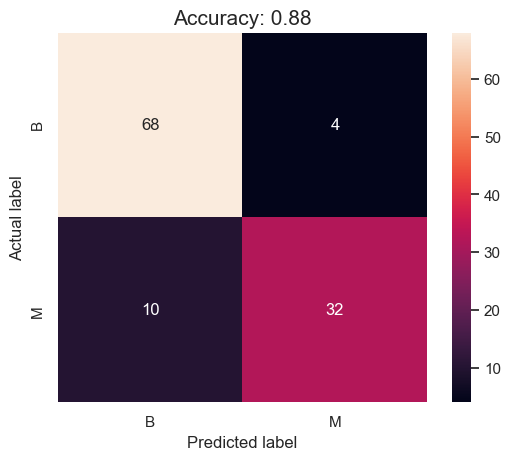

In [23]:
sns.heatmap(confusion_matrix(y_test, predictions, labels=['B', 'M']), annot=True, square = True, xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy: {score:.2f}', size = 15)

Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [24]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)
X = data_df.drop('diagnosis', axis=1)
y = data_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

preprocessing2 = make_column_transformer(
    ('drop', X_train.filter(regex='^perimeter|^area|^concavity|^concave|_worst$').columns.to_list()),
    (PowerTransformer(method='box-cox', standardize=False), skew_cols),
    (MinMaxScaler(), scale_cols),
    remainder='passthrough')

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [25]:
logr_model2 = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('preprocessing', preprocessing2),
    ('logistic_regression', logr_model2)
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)

print('Recall:', recall_score(y_test, predictions, pos_label='M'))
print('Precision: ', precision_score(y_test, predictions, pos_label='M'))
print('Accuracy: ', accuracy_score(y_test, predictions))

Recall: 0.7619047619047619
Precision:  0.9411764705882353
Accuracy:  0.8947368421052632


Text(0.5, 1.0, 'Accuracy: 0.89')

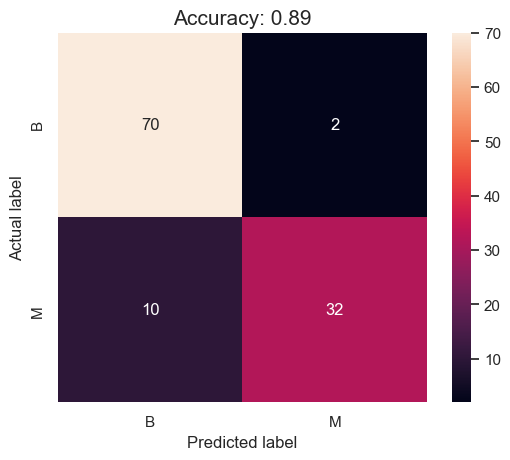

In [26]:
sns.heatmap(confusion_matrix(y_test, predictions, labels=['B', 'M']), annot=True, square = True, xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy: {score:.2f}', size = 15)

# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)
X = data_df.drop('diagnosis', axis=1)
y = data_df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_scaled = StandardScaler().fit_transform(X_train)

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [28]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)
num_components = (pca.explained_variance_ratio_.cumsum() >= 0.99).sum()

print("Numero de componentes: ", num_components)

Numero de componentes:  29


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [29]:
logr_model3 = LogisticRegression(max_iter=1000)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logistic_regression', logr_model3)
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)

print('Recall:', recall_score(y_test, predictions, pos_label='M'))
print('Precision: ', precision_score(y_test, predictions, pos_label='M'))
print('Accuracy: ', accuracy_score(y_test, predictions))

Recall: 0.9523809523809523
Precision:  0.975609756097561
Accuracy:  0.9736842105263158


Text(0.5, 1.0, 'Accuracy: 0.97')

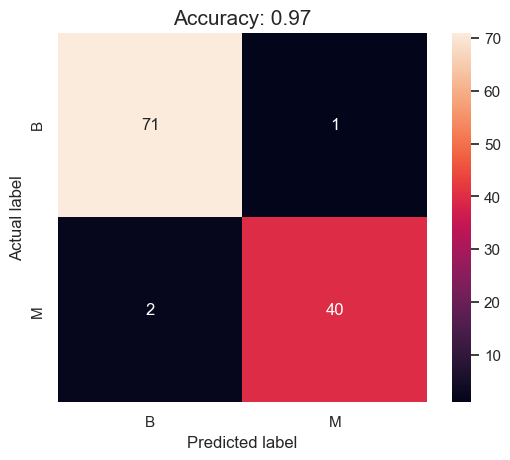

In [30]:
sns.heatmap(confusion_matrix(y_test, predictions, labels=['B', 'M']), annot=True, square = True, xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Accuracy: {score:.2f}', size = 15)

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

**En un modelo de diagnóstico médico hay que obtener los menos Falsos Negativos, es decir, casos positivos que fueron clasificados incorrectamente como negativos. Para medir estos Falsos Negativos, la métrica mas importante es el Recall.**

**Para el caso de un modelo de diagnóstico médico, lo ideal sería disminuir el threshold, con la finalidad de "cachar" todos los resultados que verdaderamente son positivos. La desventaja de este cambio, es que habrá un aumento en Falsos Positivos, es decir, casos que son negativos pero fueron diagnosticados como positivos.**